<img src="../gcd.png" align="right" style="float" width="100">
<img src="../logo_UV.jpg"  align="right" style="float" width="200">



<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 4. SVM for regression. Decision trees for classification and regression.</h2></font> 



#### Miguel Ángel Fernández Torres, Yolanda Vives Gilabert, Álvaro Moreno Martínez, Marcelino Martínez Sober

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

### SVM for regression

#### We will begin with an example using a toy database.

/var/folders/yy/_wvn17yd64b4l3kf2w95h37r0000gn/T/ipykernel_43478/3090701853.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


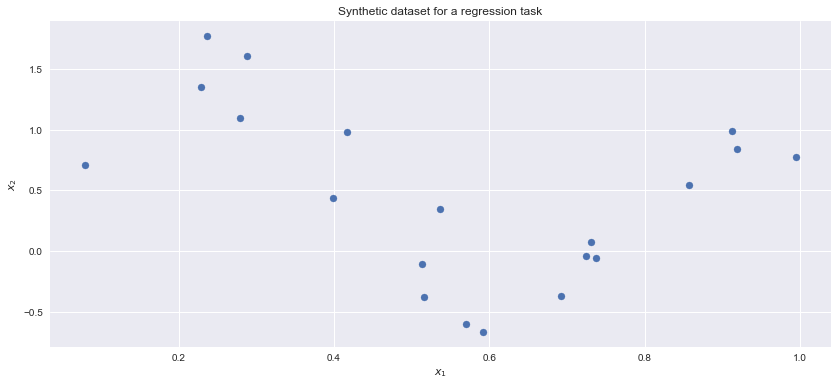

In [3]:
# Generate data following a sine wave and add noise.
N = 20 # Number of data points
X = np.random.rand(N,1)

y = np.sin(7*X[:,0] ) + 1.0 * np.random.rand(N,)

# Represent the data, using seaborn style....
plt.style.use('seaborn')

fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(X, y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Synthetic dataset for a regression task')


# Split data into train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3)

# Generate samples to cover the whole domain, for visualization purposes
xx = np.expand_dims(np.linspace(np.min(X), np.max(X), 30), axis=1)


#### Let's apply SVR on the generated data
First, we will use some manually chosen parameters to see the predictions for the *training* samples.

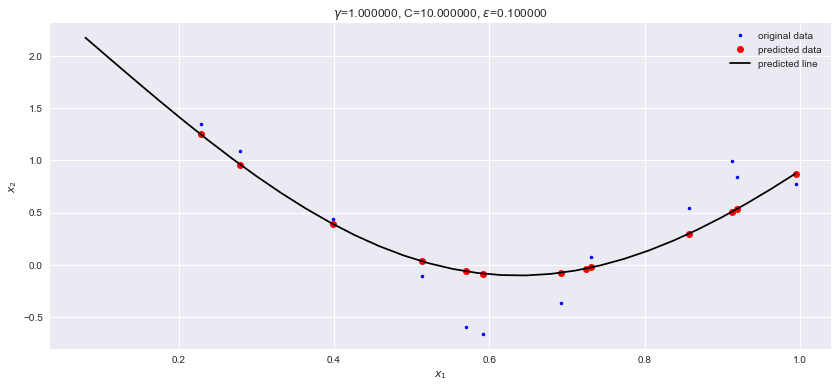

In [4]:
C = 10
epsilon = 0.1
gamma = 1.0

svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
svr.fit(Xtrain, ytrain)

y_hat = svr.predict(Xtrain)
yy = svr.predict(xx)

fig,ax = plt.subplots(figsize=(14,6))
ax.plot(Xtrain, ytrain, 'b.', label="original data")
ax.plot(Xtrain, y_hat, 'ro', label="predicted data")
ax.plot(xx, yy, 'k', label="predicted line")

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
ax.legend();


**Exercise.** Analyze the effect of the C parameter. Show the results obtained for different values of C and the training subset. Describe briefly the effect of C on the predictions. 

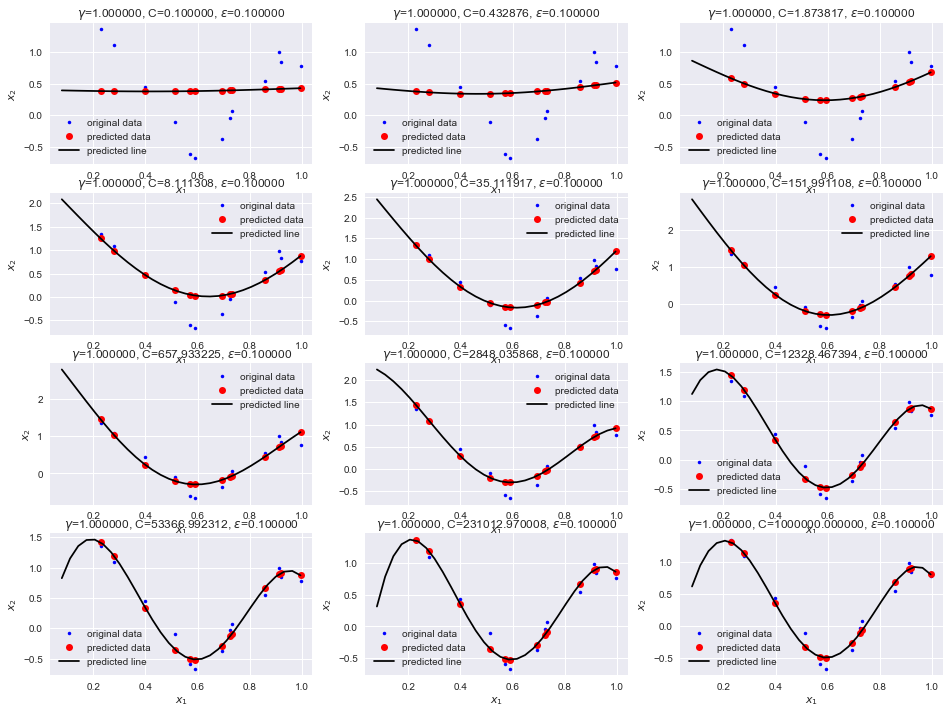

In [5]:
C_values = np.logspace(-1, 6, 12)
epsilon = 0.1
gamma = 1.0

plt.figure(figsize=(16, 12))

for n, C in enumerate(C_values):
    svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
    svr.fit(Xtrain, ytrain)

    y_hat = svr.predict(Xtrain)
    yy = svr.predict(xx)

    ax = plt.subplot(4, 3, n + 1)
    
    ax.plot(Xtrain, ytrain, 'b.', label="original data")
    ax.plot(Xtrain, y_hat, 'ro', label="predicted data")
    ax.plot(xx, yy, 'k', label="predicted line")

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
    ax.legend();


C is a regularization parameter that controls the trade-off between achieving a smooth decision boundary and classifying the training points correctly.
- A smaller C accepts a higher training error. Allowing some training points to be outside the margin or on the wrong side of the hyperplane.
- A larger C imposes a stricter penalty for errors, aiming for a more accurate fit to the training data. The model becomes less tolerant of training errors, and the decision boundary may be more influenced by individual data points.

**Exercise.** Analyze the effect of the $\gamma$ parameter. Show the results obtained for differentt values of $\gamma$ and the training subset. Describe briefly the effect of $\gamma$ on the predictions.

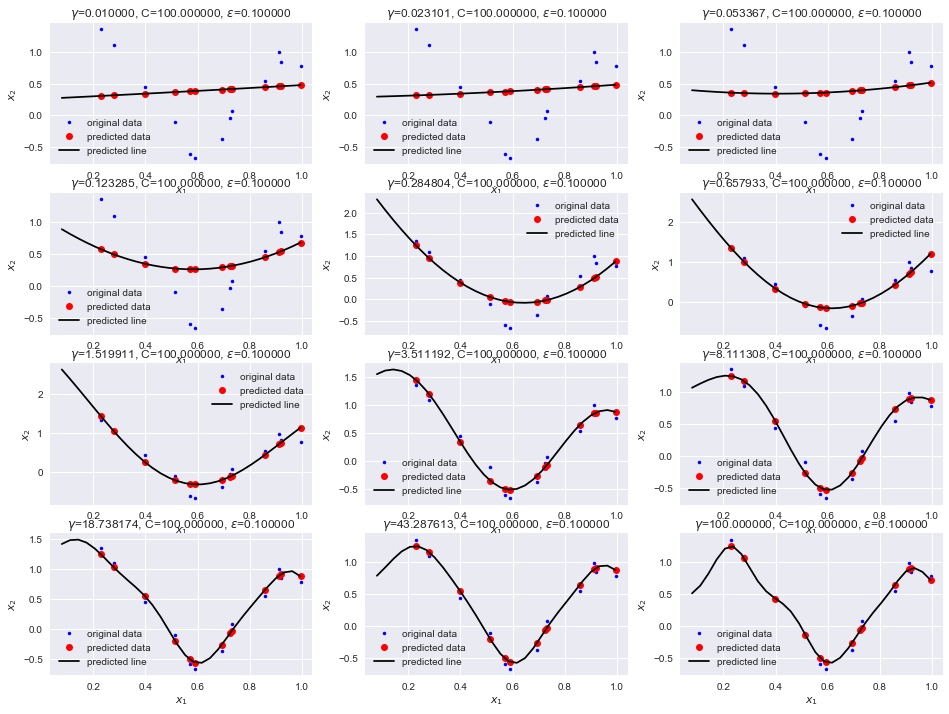

In [6]:
C = 100
epsilon = 0.1
gammas = np.logspace(-2, 2, 12)

plt.figure(figsize=(16, 12))

for n, gamma in enumerate(gammas):
    svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
    svr.fit(Xtrain, ytrain)

    y_hat = svr.predict(Xtrain)
    yy = svr.predict(xx)

    ax = plt.subplot(4, 3, n + 1)
    
    ax.plot(Xtrain, ytrain, 'b.', label="original data")
    ax.plot(Xtrain, y_hat, 'ro', label="predicted data")
    ax.plot(xx, yy, 'k', label="predicted line")

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
    ax.legend();


γ is a parameter that influences the shape of the decision boundary or regression function. It defines the influence of a single training example, with low values meaning a broader influence and high values meaning a more localized influence.

- A smaller γ results in a broader influence of each training example. The model is less sensitive to variations in the individual data points, leading to a smoother regression function.
- A larger γ makes each training example have a more localized influence. The model becomes more sensitive to variations in the individual data points, potentially leading to a more complex and wiggly regression function.

**Exercise.** Repeat the previous exercise, now analyzing the effect of $\varepsilon$. Instead of copy-pasting the previous code implementation, create a function to show the results obtained, which receives the *train* or *test* subset as input argument.

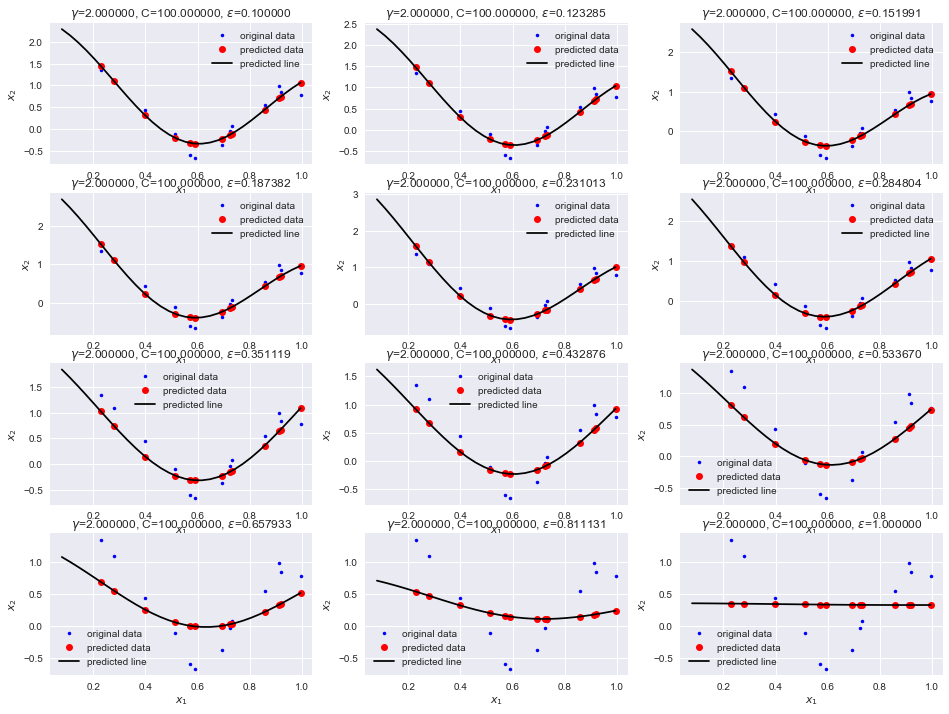

In [7]:
C = 100
epsilons = np.logspace(-1, 0, 12)
gamma = 2

plt.figure(figsize=(16, 12))

for n, epsilon in enumerate(epsilons):
    svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
    svr.fit(Xtrain, ytrain)

    y_hat = svr.predict(Xtrain)
    yy = svr.predict(xx)

    ax = plt.subplot(4, 3, n + 1)
    
    ax.plot(Xtrain, ytrain, 'b.', label="original data")
    ax.plot(Xtrain, y_hat, 'ro', label="predicted data")
    ax.plot(xx, yy, 'k', label="predicted line")

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
    ax.legend();

In SVR, the ε-SVR variant introduces a margin of tolerance ε around the predicted values. This tolerance allows some deviation from the actual target values within the margin ε.
- A smaller ε tightens the margin of tolerance. Predictions must be closer to the actual target values. The model may become more sensitive to noise in the training data, potentially capturing fluctuations that may not generalize well.
- A larger ε widens the margin of tolerance. Predictions can deviate further from the actual target values. The model becomes more tolerant of variations in the training data, potentially leading to a smoother and more generalized regression function.

**Exercise**
Combine the parameters sweeps done for $C$, $\gamma$,$\epsilon$. To this end, follow the procedure introduced in the previous lab session and use the function GridSearchCV to determine a suitable combination of parameters for this task.

In [8]:
sigma_mean = np.mean(scipy.spatial.distance.pdist(X))
gamma_mean = 1/2/sigma_mean**2
param_grid = [{
    'C': np.logspace(-3, 3, 7),
    'epsilon': np.logspace(-3, 3, 7),
    'gamma': np.logspace(np.log10(gamma_mean*0.1), np.log10(gamma_mean*10), 20),
    'kernel': ['rbf']
}]
gcv = GridSearchCV(SVR(), param_grid=param_grid, cv=5, n_jobs=2)
gcv.fit(Xtrain,ytrain)

gcv.best_params_

{'C': 1.0, 'epsilon': 0.1, 'gamma': 25.951150127180178, 'kernel': 'rbf'}

<Figure size 576x576 with 0 Axes>

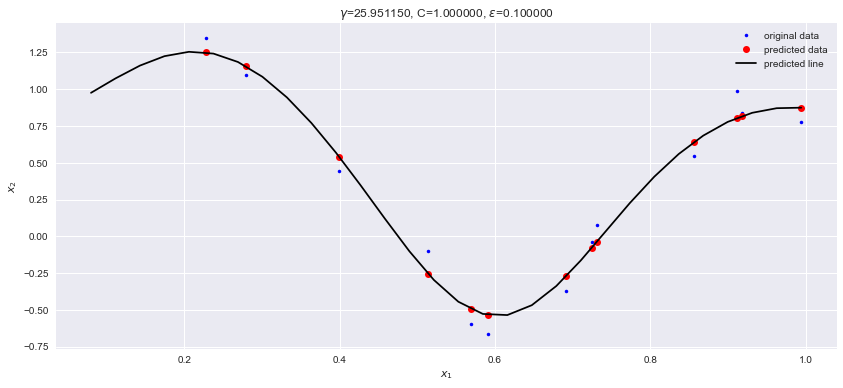

In [9]:
C = gcv.best_params_['C']
epsilon = gcv.best_params_['epsilon']
gamma = gcv.best_params_['gamma']

plt.figure(figsize=(8, 8))


svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
svr.fit(Xtrain, ytrain)

y_hat = svr.predict(Xtrain)
yy = svr.predict(xx)

fig,ax = plt.subplots(figsize=(14,6))
ax.plot(Xtrain, ytrain, 'b.', label="original data")
ax.plot(Xtrain, y_hat, 'ro', label="predicted data")
ax.plot(xx, yy, 'k', label="predicted line")

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
ax.legend();

### Decision trees for classification

To understand how decision trees for classification work, we are going to generate a tree with a unique node. To this end, we will make use of the IRIS database with three different classes. `X` contains 4 input variables. The objective is to find the variable which is the most helpful to classify when fixing a threshold to classify samples according to two different groups. To make a decision on the quality of the generated groups, we need to make use of an evaluation metric. Entropy (E) and Gini index (G) are two well-known metrics used in decision trees for classification.

Entropy is defined as $$ E=-\sum_c P_c\log_2 P_c $$ 

Gini index is defined as $$ G = \sum_c P_c(1-Pc) = 1-\sum_c P_c^2 $$

being $P_c$ the (estimated) probability for each class. When both metrics are equal to 0 for a group, it only contains samples belonging to one class. In contrast, the higher the value of the entropy or the Gini index, the higher the number of classes in the group.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

# First we will use entropy, then the Gini index
def entropy(y):
    prob = [np.sum(y==c) for c in set(y)]
    prob /= np.sum(prob)
    entropy = np.sum(-prob * np.log2(prob)) if all(prob != 0) else 0
    return entropy

X, y = load_iris(return_X_y=True)
#X.shape[1]
#X[:,0]


We will start by computing the entropy of the dataset. Then we will look for partitions in a systematic way to subsequently select the ones which minimize the value of the entropy. Remember that the objective is to find groups with entropy equal to 0, i.e., groups with samples belonging to only one class.

In [11]:
# Initial entropy for the whole database
entropy_root = entropy(y)

# Start the search
entropy_min = entropy_root
feature = 0
threshold = None
# Try out with all the variables in X ...
for feat in range(X.shape[1]):
    # And try out with all the possible values for each variable ...
    for th in X[:,feat]:
        # Index to select those samples below the threshold th
        idx = X[:,feat] <= th
        # Split into two groups, left and right
        left = y[idx]
        right = y[~idx]
        # Measure their entropies
        entropy_left = entropy(left)
        entropy_right = entropy(right)
        # And if the weighted sum of entropies is lower than the current one, we update feature and threshold
        if (entropy_left*len(left) + entropy_right*len(right))/len(y) < entropy_min:
            entropy_min = (entropy_left*len(left) + entropy_right*len(right))/len(y)
            feature = feat
            threshold = th

# See if we succeeded in our search
if threshold is None:
    print('Spliting did not improve')
else:
    print('Spliting improved given feature %d and threshold %f' %
            (feature, threshold))
    idx = X[:,feature] <= threshold
    left = y[idx]
    right = y[~idx]
    entropy_left = entropy(left)
    entropy_right = entropy(right)
    weighted_entropy = (entropy_left*len(left) + entropy_right*len(right))/len(y)
    print('  left entropy  %5.3f' % entropy_left)
    print('  right entropy %5.3f' % entropy_right)
    print('  total entropy %5.3f' % weighted_entropy)
    print('  root entropy %5.3f ' % entropy_root)

    print('Left samples\n', left)
    print('Right samples\n', right) 
    

Spliting improved given feature 2 and threshold 1.900000
  left entropy  0.000
  right entropy 1.000
  total entropy 0.667
  root entropy 1.585 
Left samples
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Right samples
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


The first result obtained is reasonable. By considering only one split, all samples belonging to the class 0 are in the left node. Now we have to repeat the process to subdivide the right group/node. Hope you understood the concept.

Our toy decision tree is helpful to learn, but more optimal decision tree implementations have to be used when dealing with more challenging tasks. ``DecisionTreeClassifier`` function is available in Scikit-Learn. Repeat the previous exercise using this function.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Here below we provide an example on how to use the decision trees' functions in Scikit-Learn.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

# Create the decision tree object

# Note: Gini index is used by default.
#criterion{“gini”, “entropy”}, default=”gini”
dtc = DecisionTreeClassifier(criterion='entropy')
#dtc = DecisionTreeClassifier(criterion='gini')

# Train the decision tree
dtc.fit(Xtrain, ytrain)

# Evaluate the decision tree using the test subset
dtc.score(Xtest, ytest)
#dtc.score(Xtrain, ytrain)

0.9333333333333333

Scikit-Learn allows graphically representing the decision tree obtained. This is very relevant, given that one tof the most important advantages of decision trees is their interpretability capabilities. Once the tree is trained, this shows which have been the most significant variables during the classification process, as well as their associated thresholds.

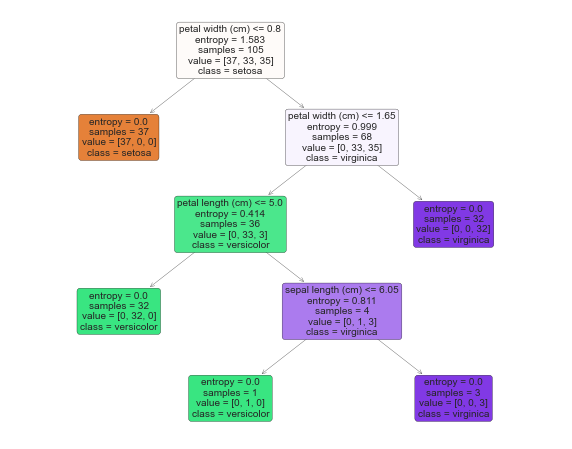

In [13]:
from sklearn.tree import plot_tree

iris = load_iris()

plt.figure(figsize=(10,8))

#plot_tree allows visualizing the tree
plot_tree(dtc, feature_names=iris.feature_names,
          class_names=iris.target_names, filled=True, 
          rounded=True, fontsize=10);



It is also interesting to visualize how the tree partitions the input space to address the classification task. Here below we provide a classification example using only two input variables to show this.

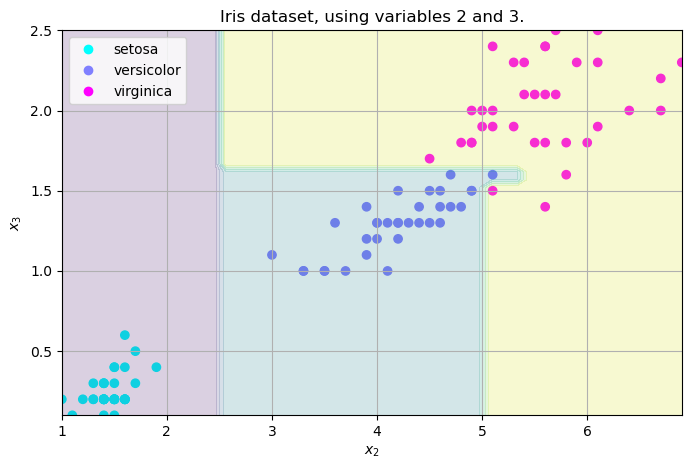

In [14]:
# Define a grid to show the classification boundaries
varx, vary = 2, 3
minx, maxx = np.min(X[:,varx]), np.max(X[:,varx])
miny, maxy = np.min(X[:,vary]), np.max(X[:,vary])

npoints = 50
xx = np.linspace(minx, maxx, npoints)
yy = np.linspace(miny, maxy, npoints)

# Retrain the tree using only varx and vary
dtc.fit(Xtrain[:,[varx, vary]], ytrain)

# Perform inference for the whole grid to show the contour
xx, yy = np.meshgrid(xx, yy)
zz = np.zeros((npoints, npoints))
for i in range(npoints):
    for j in range(npoints):
        zz[i,j] = dtc.predict(np.c_[xx[i,j], yy[i,j]])


# Plot the tree boundaries and the dataset classes
plt.style.use('default')        
fig,ax = plt.subplots(figsize=(8,5))
sc=ax.scatter(Xtrain[:, varx], Xtrain[:, vary],
                 c=ytrain, cmap=plt.get_cmap('cool'))

ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_3$')
ax.set_title('Iris dataset, using variables 2 and 3.')

# Show the tree classification boundaries 
ax.contourf(xx, yy, zz, alpha=0.2)
h, l = sc.legend_elements()
ax.legend(h,iris.target_names), plt.grid(1);

Another interesting feature of the trees implemented using Scikit-Learn is that, once trained, they provide a ranking of the most important variables to perform the partitions (as well as those that appear on the first nodes of the tree). The ranking is provided by the ``feature_importances_`` attribution. In this way, the decision tree can also be used as a feature selection method.

In [15]:
dtc.feature_importances_

array([0.67336375, 0.32663625])

*Exercise.* Use DecisionTreeClassifier and the dataset load_breast_cancer.

- Load the breast_cancer dataset.
- Train the model with the 60% of the data samples. Evaluate the average accuracy for the test subset. 
- Represent graphically the tree.
- Create a ranking sorting the variables by relevance.
- Repeat the previous steps, but following a different strategy. Now perform dimensionality reduction, applying PCA and considering 4 features. To this end, normalize the variables first, if needed. Be careful with the train/test split to normalize and apply PCA.
- Compare the results obtained for both approaches in terms of accuracy, using the same train/test split. Repeat the comparison experiment multiple times. Do you observe any difference in the results?

Both results are very close. Average results without PCA are better, but not always. The decision tree also handles less important parameters well

0.9342105263157895


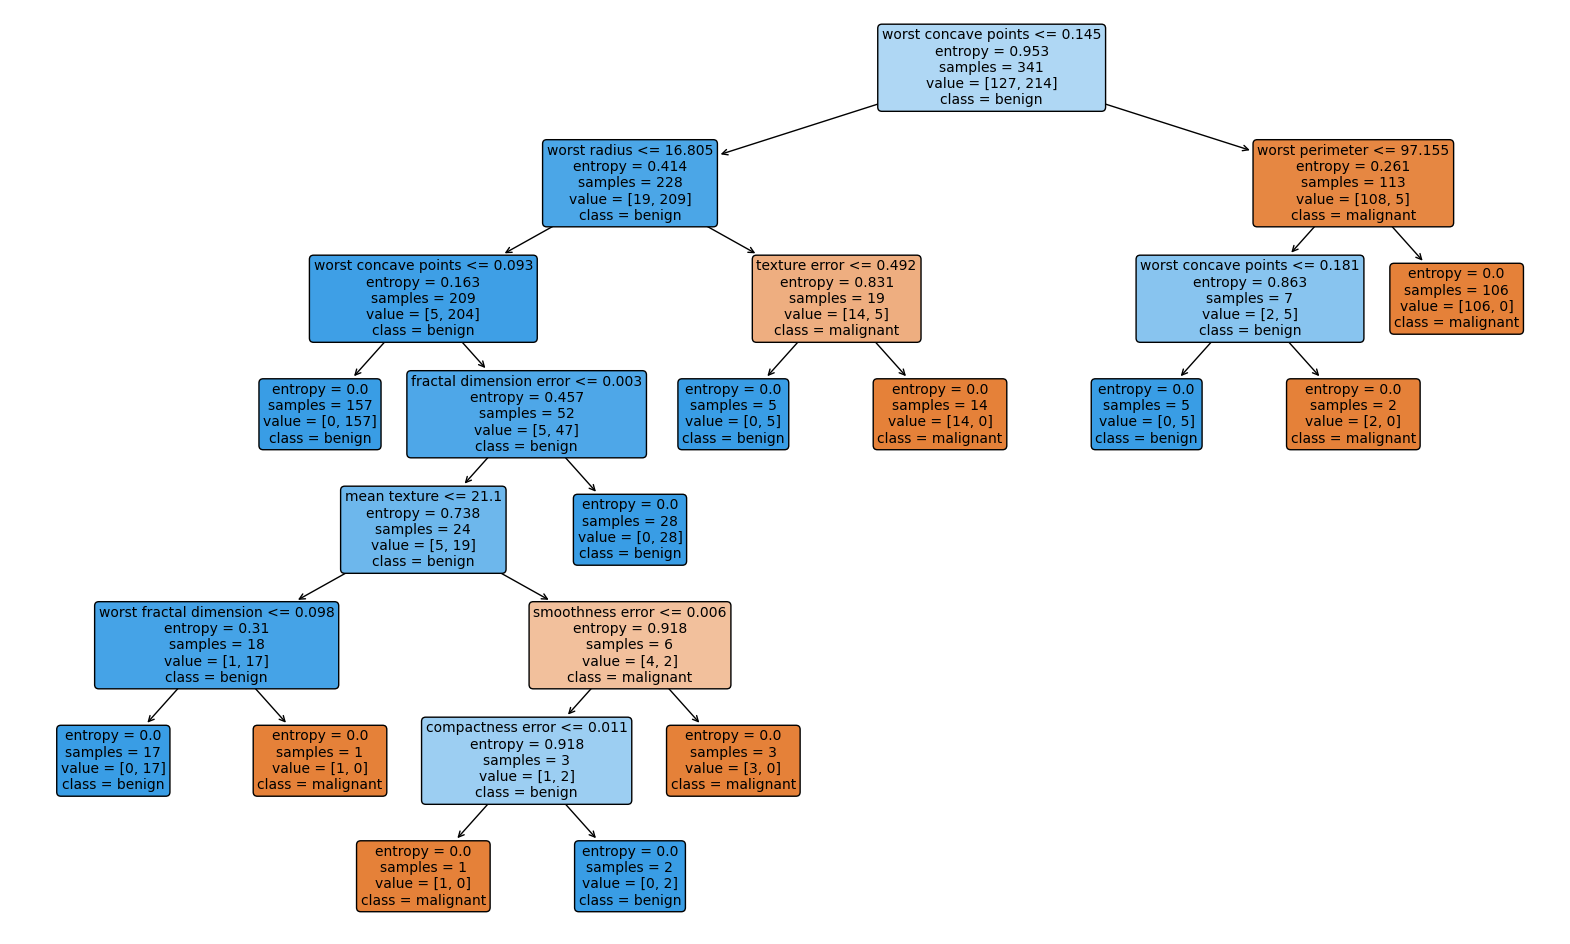

In [16]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(Xtrain, ytrain)
print(dtc.score(Xtest, ytest))

plt.figure(figsize=(20,12))

#plot_tree allows visualizing the tree
plot_tree(dtc, feature_names=data.feature_names,
          class_names=data.target_names, filled=True, 
          rounded=True, fontsize=10);



In [17]:
feature_importances = dtc.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
print("Feature Ranking (Approach 1):")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {data.feature_names[idx]}")

Feature Ranking (Approach 1):
1. worst concave points
2. worst radius
3. worst perimeter
4. texture error
5. mean texture
6. fractal dimension error
7. worst fractal dimension
8. compactness error
9. smoothness error
10. worst texture
11. mean fractal dimension
12. worst concavity
13. mean perimeter
14. mean area
15. mean smoothness
16. mean compactness
17. mean concavity
18. mean concave points
19. mean symmetry
20. radius error
21. worst area
22. worst compactness
23. perimeter error
24. area error
25. worst symmetry
26. worst smoothness
27. concavity error
28. concave points error
29. symmetry error
30. mean radius


0.9429824561403509
Accuracy with PCA: 0.94


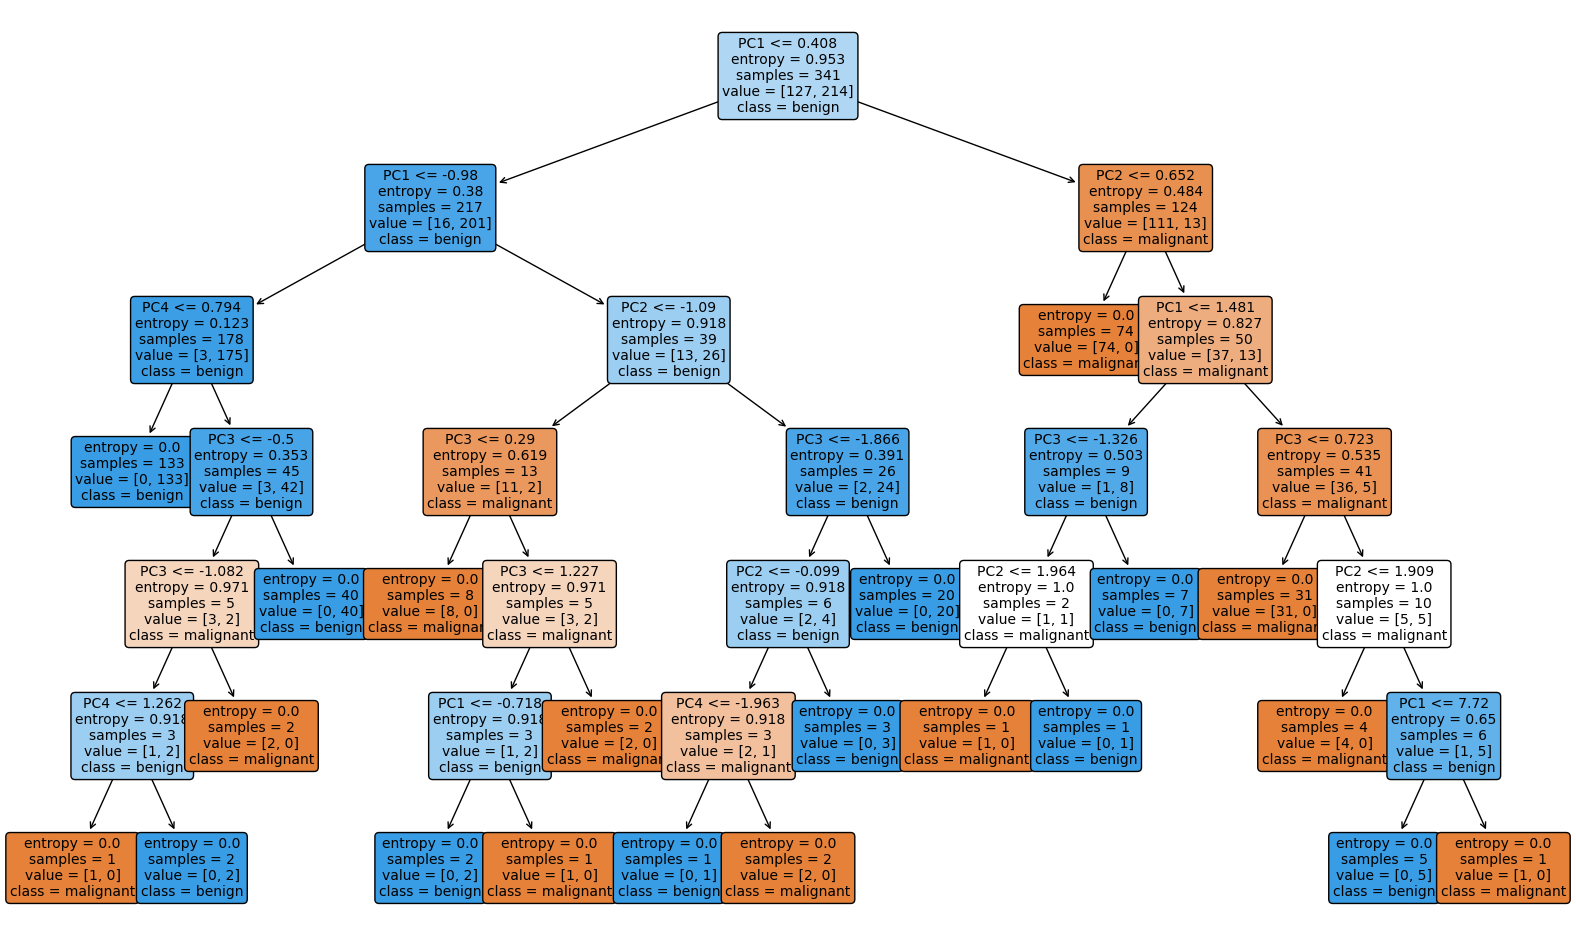

PCA Components Importance:
[0.45419465 0.19118493 0.0886119  0.06624796]


In [18]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(Xtrain)
X_test_normalized = scaler.transform(Xtest)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

dtc_pca = DecisionTreeClassifier(criterion='entropy')
dtc_pca.fit(X_train_pca, ytrain)

y_pred_pca = dtc_pca.predict(X_test_pca)
print(dtc_pca.score(X_test_pca, ytest))

accuracy_pca = accuracy_score(ytest, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca:.2f}")

plt.figure(figsize=(20, 12))
plot_tree(dtc_pca, filled=True, feature_names=[f'PC{i+1}' for i in range(4)], class_names=data.target_names, rounded=True, fontsize=10)
plt.show()


print("PCA Components Importance:")
print(pca.explained_variance_ratio_)

### Decision trees for regression

Decision trees for regression perform in a similar way to decision trees for classification: the objective is to identify the most descriptive variables to partition the input space and model the output function.

The main differences between decision trees for classification and regression are:

- For each node (group), instead of predicting according to the class for which the number of samples is the largest, the prediction is computed by taking the average of the value of these samples.

- The metric to partition each node is MSE, MAE or similar ones.

To illustrate the performance of decision trees for regression, we will make use of the MSE:

$$ \textrm{MSE} = \frac{1}{N}\sum(y_i-\overline{y})^2 $$

where $\overline{y}$ is the average value of the samples in a node. This is the same as saying that we will make use of the variance of the samples in each node. To illustrate the regression task, here below we provide a toy example using data points which follow the distribution of a *sinc* signal.

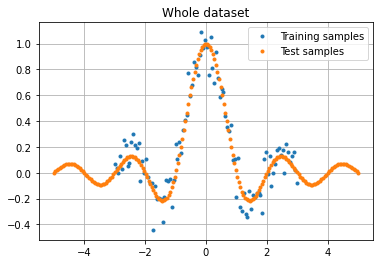

In [19]:
# Generate toy database

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xtrain = np.linspace(-3, 3, 100)
ytrain = np.sinc(xtrain) + \
     0.1 * np.random.randn(xtrain.shape[0])
#0.05 * np.random.randn(xtrain.shape[0])
xtest = np.linspace(-5, 5, 200)
ytest = np.sinc(xtest)


plt.plot(xtrain, ytrain, '.', label='Training samples')
plt.plot(xtest, ytest, '.', label='Test samples')
plt.legend(), plt.grid(1);
plt.title('Whole dataset')

# Our algorithm requires a 2D input X, we need to reshape xtrain, xtest to be column vectors
xtrain, xtest = xtrain.reshape(-1,1), xtest.reshape(-1,1)

`DecisionTreeRegressor` function is available in Scikit-Learn.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)

print('Score train %f'% (dtr.score(xtrain, ytrain)))
print('Score test %f'% (dtr.score(xtest, ytest)))


Score train 1.000000
Score test 0.885288


**Exercise** Why do you think the *score* for the train subset is equal to 1?

Perform a sweep of the tree depth parameter (*max_depth*) from 1 to 10 and determine which depth you would choose. Justify your answer.

In [21]:
depth_values = np.arange(1, 11)

for depth in depth_values:
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(xtrain, ytrain)
    print('Depth: ', depth)
    print('Score train %f'% (dtr.score(xtrain, ytrain)))
    print('Score test %f'% (dtr.score(xtest, ytest)))

Depth:  1
Score train 0.187901
Score test 0.018049
Depth:  2
Score train 0.774723
Score test 0.788043
Depth:  3
Score train 0.857667
Score test 0.827009
Depth:  4
Score train 0.919960
Score test 0.898179
Depth:  5
Score train 0.949954
Score test 0.907393
Depth:  6
Score train 0.972368
Score test 0.904946
Depth:  7
Score train 0.984587
Score test 0.899689
Depth:  8
Score train 0.989898
Score test 0.891680
Depth:  9
Score train 0.997700
Score test 0.888009
Depth:  10
Score train 0.999433
Score test 0.885485


When the score for the training subset is equal to 1.0 in a decision tree regression model, it indicates that the model has perfectly fit the training data. A score of 1.0 means that the predictions on the training data match the actual target values exactly. The decision tree may have become too complex and has captured noise or outliers in the training data, leading to a model that performs exceptionally well on the training set but may not generalize well to new, unseen data.

In my opinion the best depth is around 4 and 5 because score test is the best. For small values algorithm does not estimate function (draws lines) but for big values algorithm sign single points so it is overfitting.

Generate a new tree with a particular depth (e.g., max_depth=4).

0.9199596944863568

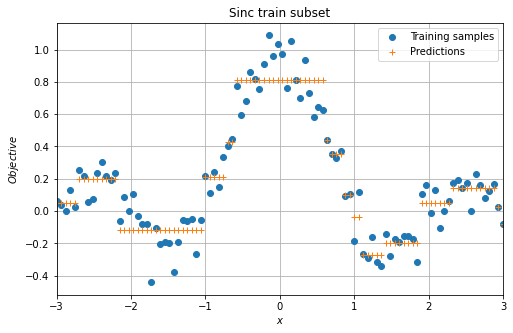

In [22]:
# Generate a new tree with a particular depth (e.g., max_depth=4)
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(xtrain, ytrain)
#Train
yp = dtr.predict(xtrain)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(xtrain, ytrain, 'o', label='Training samples')
ax.plot(xtrain, yp, '+', label='Predictions')

ax.set_xlabel('$x$')
ax.set_ylabel('$Objective$')
ax.set_title('Sinc train subset')
ax.grid(1)
ax.legend();
ax.set_xlim(left=np.min(xtrain),right=np.max(xtrain)) # Set X axis limits
dtr.score(xtrain, ytrain)

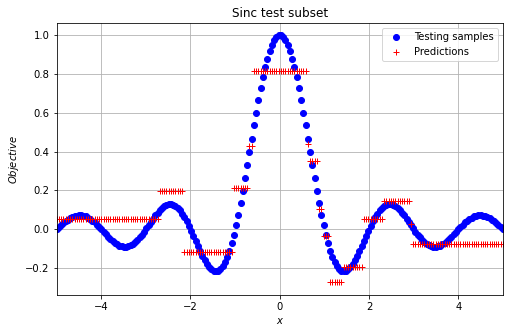

In [23]:
#Test
yt = dtr.predict(xtest)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(xtest, ytest, 'bo', label='Testing samples')
ax.plot(xtest, yt, 'r+', label='Predictions')

ax.set_xlabel('$x$')
ax.set_ylabel('$Objective$')
ax.set_title('Sinc test subset')

ax.set_xlim(left=np.min(xtest),right=np.max(xtest))
ax.grid(1)
ax.legend();

As for classification tasks, we can also represent the tree using `plot_tree`.

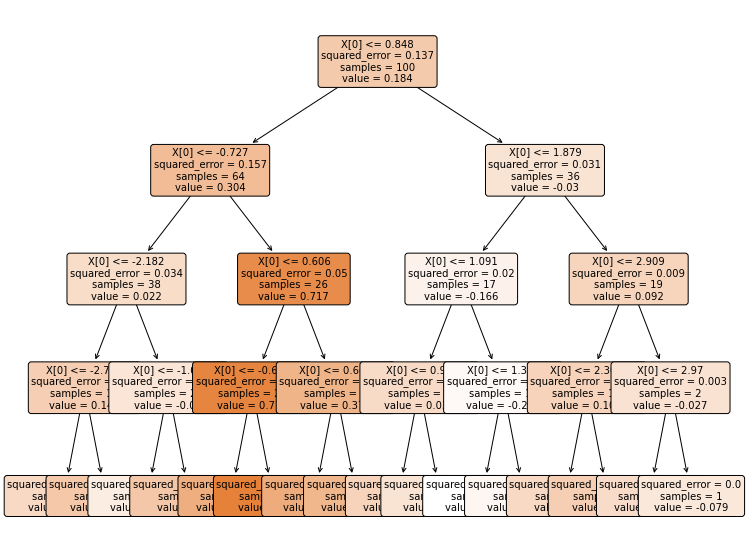

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(dtr, filled=True, rounded=True, fontsize=10);

**Exercise**. Use `DecisionTreeRegression` and the `load_diabetes` database.

- Train a model using the 70% of the samples.
- What is the performance of the model on the test subset? Use the $R^2$ coefficient of determination to evaluate it.
- Represent graphically the tree (be patient, it takes some time).
- How could you improve the performance of the tree on the test set? Suggestion: Analyze the tree depth (max_depth) and the number of samples per leaf/node (min_samples_leaf).
- What is the difference between optimizing the number of samples per leaf and the tree depth? Which method achieves better results?
- Determine the most important variables for the regression decision tree, given both previous optimizations.

Score train 1.000000
Score test -0.272610
R^2 Score: -0.27261030422844956


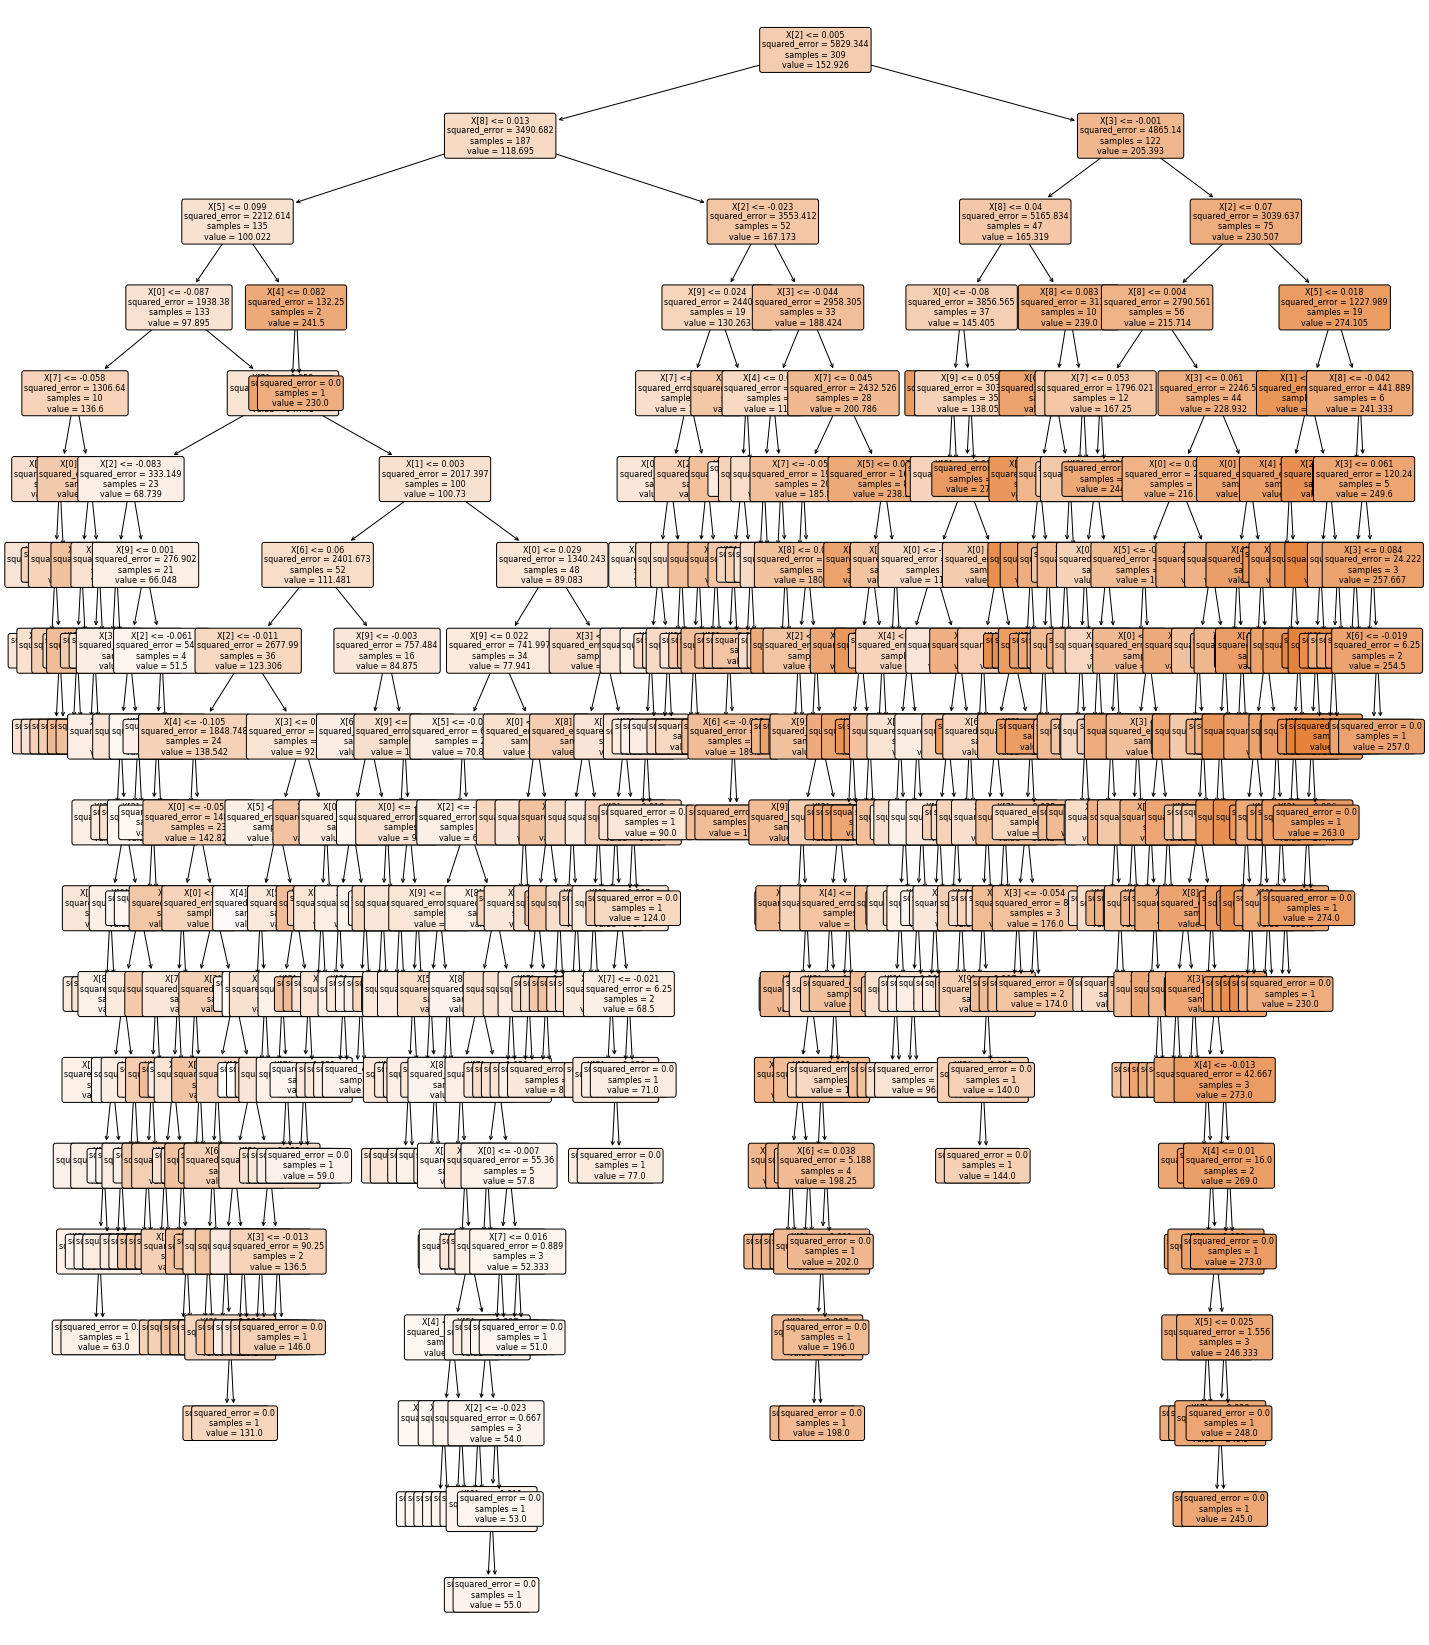

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = load_diabetes(return_X_y=True)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

dtr = DecisionTreeRegressor()
dtr.fit(Xtrain, ytrain)

print('Score train %f'% (dtr.score(Xtrain, ytrain)))
print('Score test %f'% (dtr.score(Xtest, ytest)))

from sklearn.metrics import r2_score

r2 = r2_score(ytest, dtr.predict(Xtest))

print("R^2 Score:", r2)

plt.figure(figsize=(24,30))
plot_tree(dtr, filled=True, rounded=True, fontsize=8);

In [26]:
depth_values = np.arange(1, 11)
leaf_values = np.arange(1, 31)

best_score = 0
best_score_t = 0
best_depth = 0
best_leaf = 0
for depth in depth_values:
    for leaf_value in leaf_values:
        dtr = DecisionTreeRegressor(min_samples_leaf =leaf_value, max_depth=depth)
        dtr.fit(Xtrain, ytrain)
        if dtr.score(Xtest, ytest) > best_score:
            best_score = dtr.score(Xtest, ytest)
            best_score_t = dtr.score(Xtrain, ytrain)
            best_depth = depth
            best_leaf = leaf_value
#         print('Depth: ', depth, 'Leafe value: ', leaf_value)
#         print('Score train %f'% (dtr.score(Xtrain, ytrain)), 'Score test %f'% (dtr.score(Xtest, ytest)))

print('Leaf: ', best_leaf, 'Deapth: ', best_depth)
print('Score train %f'% best_score_t, 'Score test %f'% best_score)

Leaf:  17 Deapth:  4
Score train 0.576181 Score test 0.353186


- A deeper tree can capture more complex patterns in the training data but is more prone to overfitting, especially if the dataset is noisy or contains outliers. A smaller max_depth may lead to a simpler model with potentially better generalization.
- The minimum number of samples required to be in a leaf node. If a split results in a leaf node having fewer samples than min_samples_leaf, the split is not considered. Increasing min_samples_leaf can lead to a more generalized model by preventing the algorithm from creating nodes that only fit the noise in the training data. Larger values can help prevent overfitting.

the optimal combination of max_depth and min_samples_leaf depends on the dataset, and it's often beneficial to iteratively tune both parameters to achieve the best results. The specific impact on performance can vary, and the effectiveness of each method is dataset-dependent.

In [27]:
feature_importances = dtc.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
print("Feature Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {data.feature_names[idx]}")

Feature Ranking (Approach 1):
1. worst concave points
2. worst radius
3. worst perimeter
4. texture error
5. mean texture
6. fractal dimension error
7. worst fractal dimension
8. compactness error
9. smoothness error
10. worst texture
11. mean fractal dimension
12. worst concavity
13. mean perimeter
14. mean area
15. mean smoothness
16. mean compactness
17. mean concavity
18. mean concave points
19. mean symmetry
20. radius error
21. worst area
22. worst compactness
23. perimeter error
24. area error
25. worst symmetry
26. worst smoothness
27. concavity error
28. concave points error
29. symmetry error
30. mean radius
